1.Примените алгоритм KNN (k-ближайших соседей) для данных по заболеваемости сахарным диабетом. Датасет - diabetes.csv
Выходной столбец “outcome” принимает значения 0 или 1 и является
классификатором текущего набора данных.
-имеется диабет (значение 1)
-заболевание отсутствует (значение 0)
Используйте все остальные столбцы как data features (входные числовые
данные) для адаптации модели kNN.
Рассчитайте модель kNN для k = 5, 10, 15, 20, 25. Укажите объем тестового
набора данных равным 25% от общего количества данных.
Укажите score модели и постройте визуализацию обученной
классификации для указанных k.

Score for k=5: 0.65625
Score for k=10: 0.71875
Score for k=15: 0.7395833333333334
Score for k=20: 0.7083333333333334
Score for k=25: 0.703125


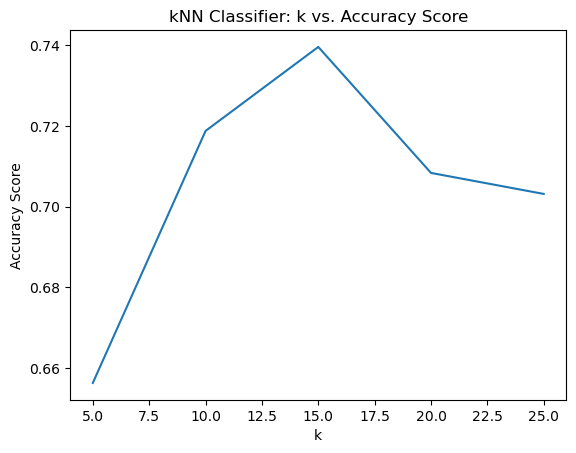

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Загружаем данные из файла csv
data = pd.read_csv("diabetes.csv")

# Удаляем столбец 'Outcome' из данных и сохраняем в переменной X
X = data.drop("Outcome", axis=1)

# Сохраняем столбец 'Outcome' в переменной y
y = data["Outcome"]

# Разделяем данные на тренировочную и тестовую выборки (25% данных для тестирования)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Определяем различные значения k для использования в модели kNN
k_values = [5, 10, 15, 20, 25]

# Создаём список для хранения результатов точности модели
accuracy_scores = []

# Цикл для обучения и тестирования модели kNN с различными значениями k
for k in k_values:
    # Создаём модель kNN с текущим значением k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Обучаем модель на тренировочных данных
    knn.fit(X_train, y_train)
    
    # Предсказание результатов для тестовых данных
    y_pred = knn.predict(X_test)
    
    # Вычисляем точность модели
    score = accuracy_score(y_test, y_pred)
    
    # Добавляем точность в список
    accuracy_scores.append(score)
    
    # Выводим результат точности модели для текущего значения k
    print(f"Score for k={k}: {score}")

    
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
    
# Строим график зависимости точности от значения k
plt.plot(k_values, accuracy_scores)
plt.xlabel("k")
plt.ylabel("Accuracy Score")
plt.title("kNN Classifier: k vs. Accuracy Score")
plt.show()


2.Постройте модель множественной линейной регрессии для атрибутов X = {SkinThickness,BMI} и Y={Insulin} из датасета предыдущего задания. Укажите score модели и предоставьте значения b, a1, a2 формулы: y = b + a1*x1 + a2*x2


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Загружаем данные из CSV-файла
data = pd.read_csv("diabetes.csv")

# Выбираем необходимые атрибуты для X и Y
X = data[["SkinThickness", "BMI"]]
Y = data["Insulin"]

# Разделяем данные на обучающий и тестовый наборы (25% данных для тестирования)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Создаём и обучаем модель множественной линейной регрессии
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)  # y = b + a1*x1 + a2*x2 для обучения модели

# Предсказание значений для тестовых данных
Y_pred = regression_model.predict(X_test)  # y = b + a1*x1 + a2*x2 для предсказания значений

# Расчет показателя качества модели
score = r2_score(Y_test, Y_pred)

# Получение коэффициентов регрессии (b, a1, a2)
b = regression_model.intercept_
a1, a2 = regression_model.coef_

print(f"Score: {score}")
print(f"b: {b}")
print(f"a1: {a1}")
print(f"a2: {a2}")


Score: 0.23559635152317926
b: 5.491427254467098
a1: 3.1072423986388915
a2: 0.3498597500472188
